In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='NanumGothic')

In [ ]:
# .dropna()

## 데이터

In [2]:
x_values=pd.read_excel("x_values.xlsx")
x_values=x_values[["단지명","거리_미터","브랜드","전체층수"]]
x_values.head()

단지명  거리_미터  브랜드  전체층수
0  공덕1삼성래미안    235    0    25
1  공덕2삼성래미안    408    1    20
2  공덕3삼성래미안    417    1    20
3      공덕현대    614    0    15
4     두영이지안    598    0     9

## 2011-2020 마포구 OLS

### OLS_start

In [23]:
def OLS_start(i): #11~20
    mapo=pd.read_excel("mapo_20"+str(i)+".xlsx")
    t=pd.merge(mapo,x_values,on="단지명",how='left')
    t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
    t["상대층수"]=t["층"]/t["전체층수"]
    #OLS
    x=t[["전용면적(㎡)","거리_미터","건축년도","브랜드","상대층수"]]
    x=sm.add_constant(x)
    y=t[["거래금액(만원)"]]
    model=sm.OLS(y,x)
    return model.fit()

### OLS_final

In [19]:
def OLS_final(i): #11~20
    mapo=pd.read_excel("mapo_20"+str(i)+".xlsx")
    t=pd.merge(mapo,x_values,on="단지명",how='left')
    #층&상대층수
    t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
    t["상대층수"]=t["층"]/t["전체층수"]
    #역세권
    t["역세권"]= (t["거리_미터"] <= 500).astype(int)
    #전용면적_제곱
    t["전용면적_제곱"] = t["전용면적(㎡)"] ** 2
    #월별_평당가격
    t["평"]=(t["전용면적(㎡)"]/3.3).round(2)
    t["평당가격"]=t["거래금액(만원)"]/t["평"].round(2)
    date=[str(i)[:4]+"-"+str(i)[4:] for i in t.계약년월]
    t["date"]=pd.to_datetime(date).to_period(freq='M')
    a=pd.DataFrame(t["평당가격"].groupby(t['date']).mean())
    a.columns=["월별_평당가격"]
    f=pd.merge(t,a.shift(),on="date",how='left')
    #OLS
    x=f[["전용면적(㎡)","전용면적_제곱","건축년도","역세권","브랜드","층","월별_평당가격","시군구"]]
    x=pd.get_dummies(x)
    x=sm.add_constant(x)
    y=f[["거래금액(만원)"]]
    model=sm.OLS(y,x, missing="drop")
    return model.fit()

In [6]:
OLS(19).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     386.1
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:58:43   Log-Likelihood:                -31611.
No. Observations:                2868   AIC:                         6.328e+04
Df Residuals:                    2837   BIC:                         6.347e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.492e+06   8.58e+04    -17.389      0.000   -1.66e+06   -1.32e+06
전용면적(㎡)             1359.0471     45.283     30.012      0.000    1270.256    1447.838
전용면적_제곱               -3.4569      0.255    -13.578      0.000      -3.956      -2.958
건축년도                 726.8468     44.380     16.378      0.000     639.826     813.867
역세권                 5943.7687    716.052      8.301      0.000    4539.734    7347.803
브랜드                 1.329e+04    898.739     14.792      0.000    1.15e+04    1.51e+04
층                    648.0122     46.137     14.045      0.000     557.546     738.478
월별_평당가격               22.7562      1.829     12.440      0.000      19.169      26.343
시군구_서울특별시 마포구 공덕동  -5.139e+04   3629.421    -14.159      0.000   -5.85e+04   -4.43e+04
시군구_서울특별시 마포구 노고산동 -8.036e+04   4931.699    -16.295      0.000      -9e+04   -7.07e+04
시군구_서울특별시 마포구 대흥동  -5.583e+04   3829.863    -14.577      0.000   -6.33e+04   -4.83e+04
시군구_서울특별시 마포구 도화동  -6.192e+04   3583.883    -17.278      0.000   -6.89e+04   -5.49e+04
시군구_서울특별시 마포구 동교동  -8.448e+04   1.48e+04     -5.719      0.000   -1.13e+05   -5.55e+04
시군구_서울특별시 마포구 마포동  -7.624e+04   4454.135    -17.117      0.000    -8.5e+04   -6.75e+04
시군구_서울특별시 마포구 망원동  -8.521e+04   3947.776    -21.583      0.000   -9.29e+04   -7.75e+04
시군구_서울특별시 마포구 상수동  -5.474e+04   4200.902    -13.030      0.000    -6.3e+04   -4.65e+04
시군구_서울특별시 마포구 상암동  -6.382e+04   3988.708    -15.999      0.000   -7.16e+04    -5.6e+04
시군구_서울특별시 마포구 서교동  -6.064e+04   4235.986    -14.316      0.000   -6.89e+04   -5.23e+04
시군구_서울특별시 마포구 성산동  -6.176e+04   3399.325    -18.167      0.000   -6.84e+04   -5.51e+04
시군구_서울특별시 마포구 신공덕동  -6.18e+04   3862.621    -16.000      0.000   -6.94e+04   -5.42e+04
시군구_서울특별시 마포구 신수동  -6.816e+04   4117.617    -16.554      0.000   -7.62e+04   -6.01e+04
시군구_서울특별시 마포구 신정동  -6.101e+04   4337.866    -14.065      0.000   -6.95e+04   -5.25e+04
시군구_서울특별시 마포구 아현동  -4.301e+04   3933.107    -10.936      0.000   -5.07e+04   -3.53e+04
시군구_서울특별시 마포구 연남동  -7.233e+04   4376.552    -16.527      0.000   -8.09e+04   -6.38e+04
시군구_서울특별시 마포구 염리동   -5.55e+04   3719.525    -14.920      0.000   -6.28e+04   -4.82e+04
시군구_서울특별시 마포구 용강동  -3.461e+04   4181.899     -8.276      0.000   -4.28e+04   -2.64e+04
시군구_서울특별시 마포구 중동   -7.888e+04   3983.090    -19.805      0.000   -8.67e+04   -7.11e+04
시군구_서울특별시 마포구 창전동  -6.674e+04   3842.205    -17.369      0.000   -7.43e+04   -5.92e+04
시군구_서울특별시 마포구 토정동  -4.484e+04   4240.051    -10.574      0.000   -5.31e+04   -3.65e+04
시군구_서울특별시 마포구 하중동  -4.055e+04   4863.682     -8.337      0.000   -5.01e+04    -3.1e+04
시군구_서울특별시 마포구 합정동  -7.538e+04   4407.506    -17.102      0.000    -8.4e+04   -6.67e+04
시군구_서울특별시 마포구 현석동  -5.326e+04   3970.244    -13.416      0.000    -6.1e+04   -4.55e+04
======================================

### resid

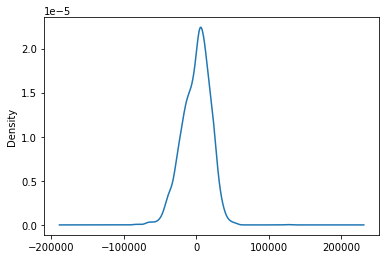

In [24]:
OLS_start(19).resid.plot(kind="kde")

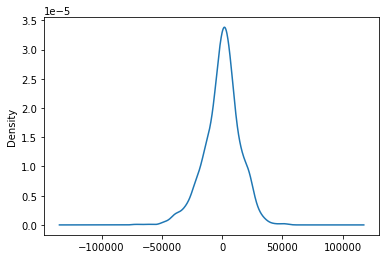

In [25]:
OLS_final(19).resid.plot(kind="kde")

## 중간작업

### 역세권

In [15]:
mapo_2013=pd.read_excel("mapo_2013.xlsx")
t=pd.merge(mapo_2013,x_values,on="단지명",how='left')
t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
t["상대층수"]=t["층"]/t["전체층수"]
t["역세권"]= (t["거리_미터"] <= 500).astype(int)
t["역세권"]

0       1
1       1
2       1
3       1
4       1
       ..
2515    1
2516    0
2517    1
2518    0
2519    1
Name: 역세권, Length: 2520, dtype: int32

### 브랜드

In [16]:
mapo_2014=pd.read_excel("mapo_2014.xlsx")
t_2=pd.merge(mapo_2014,x_values,on="단지명",how='left')
t_2["층"]=t_2["층"].apply(lambda x: 0 if x<=0 else x)
t_2["상대층수"]=t_2["층"]/t_2["전체층수"]

In [17]:
t_2_no_brand = t_2["브랜드"] == 0
no_brand_2 = t_2[t_2_no_brand]
no_brand_2 = no_brand_2.sort_values(by="거래금액(만원)", ascending=False)
no_brand_2.head(50)

시군구     번지    본번  부번          단지명   전용면적(㎡)    계약년월  계약일  \
1375   서울특별시 마포구 서교동    490   490   0       메세나폴리스  148.9810  201407    7   
1376   서울특별시 마포구 서교동    490   490   0       메세나폴리스  148.9810  201408    7   
1380   서울특별시 마포구 서교동    490   490   0       메세나폴리스  142.0340  201409   30   
1379   서울특별시 마포구 서교동    490   490   0       메세나폴리스  142.0340  201409   30   
1386   서울특별시 마포구 서교동    490   490   0       메세나폴리스  148.9810  201412   30   
1373   서울특별시 마포구 서교동    490   490   0       메세나폴리스  122.8670  201401   21   
1382   서울특별시 마포구 서교동    490   490   0       메세나폴리스  142.0340  201411    5   
1374   서울특별시 마포구 서교동    490   490   0       메세나폴리스  148.9810  201405    2   
1383   서울특별시 마포구 서교동    490   490   0       메세나폴리스  142.0340  201411    7   
1385   서울특별시 마포구 서교동    490   490   0       메세나폴리스  148.9810  201412    4   
1378   서울특별시 마포구 서교동    490   490   0       메세나폴리스  142.0340  201409   25   
1384   서울특별시 마포구 서교동    490   490   0       메세나폴리스  122.8670  201411   20   
1381   서울특별시 마포구 서교동    490   490   0       메세나폴리스  122.8670  201410   10   
1377   서울특별시 마포구 서교동    490   490   0       메세나폴리스  122.8670  201409   12   
2802   서울특별시 마포구 현석동    223   223   0    반도유보라아일랜드  140.4529  201406   20   
1030   서울특별시 마포구 상수동    394   394   0       신구강변연가  152.3360  201408   22   
1387   서울특별시 마포구 서교동    490   490   0       메세나폴리스  122.8670  201412   30   
2803   서울특별시 마포구 현석동    223   223   0    반도유보라아일랜드  122.6843  201412   15   
1313   서울특별시 마포구 상암동   1630  1630   0      휴먼시아1단지  113.9100  201409   21   
2433   서울특별시 마포구 창전동    444   444   0         서강예가  119.3010  201401   10   
1183   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201409   29   
1187   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201412    5   
1189   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201412   16   
1684  서울특별시 마포구 신공덕동    173   173   0     대우월드마크마포  121.2700  201402   20   
1168   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201407    2   
1175   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201408    8   
1855  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201410   16   
1031   서울특별시 마포구 상수동    363   363   0       월드메르디앙  144.1900  201412    2   
1981   서울특별시 마포구 신정동     30    30   0         서강GS  114.8700  201404   16   
1849  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201401   17   
1854  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201409    6   
1179   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201408   19   
1243   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201410    1   
1850  서울특별시 마포구 신공덕동    172   172   0        펜트라우스  115.0400  201402   19   
1241   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201409   27   
1029   서울특별시 마포구 상수동  353-4   353   4      밤섬리오팰리스  232.3600  201408   12   
1073   서울특별시 마포구 상암동   1743  1743   0  상암월드컵파크12단지  114.7200  201412   20   
1238   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201409    6   
1961   서울특별시 마포구 신정동     30    30   0         서강GS  114.8700  201401   22   
608    서울특별시 마포구 도화동    550   550   0           삼성  136.1000  201405    9   
1229   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201406    3   
2459   서울특별시 마포구 창전동    444   444   0         서강예가  119.3010  201407   15   
1308   서울특별시 마포구 상암동   1641  1641   0  상암카이저팰리스클래식  139.9800  201407   11   
1167   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201406   21   
1230   서울특별시 마포구 상암동   1689  1689   0   상암월드컵파크6단지  104.3200  201406   17   
1683  서울특별시 마포구 신공덕동    173   173   0     대우월드마크마포  121.2700  201402   14   
1219   서울특별시 마포구 상암동   1658  1658   0   상암월드컵파크5단지  104.6900  201409   25   
598    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201401   10   
1157   서울특별시 마포구 상암동   1655  1655   0   상암월드컵파크4단지  104.7800  201402   14   
630    서울특별시 마포구 도화동    550   550   0           삼성  136.6500  201412    1   

      거래금액(만원)   층  건축년도          도로명  거리_미터  브랜드  전체층수      상대층수  
1375    170115  37  2

### 상관계수

In [28]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

In [54]:
mapo_2019=pd.read_excel("mapo_2019.xlsx")
t=pd.merge(mapo_2019,x_values,on="단지명",how='left')
t["층"]=t["층"].apply(lambda x: 0 if x<=0 else x)
t["상대층수"]=t["층"]/t["전체층수"]

In [55]:
t.corr()

본번        부번   전용면적(㎡)      계약년월       계약일  거래금액(만원)  \
본번        1.000000 -0.149406  0.069767  0.071312  0.013947  0.074109   
부번       -0.149406  1.000000 -0.101244 -0.030762  0.020830 -0.188032   
전용면적(㎡)   0.069767 -0.101244  1.000000  0.095710 -0.037594  0.665513   
계약년월      0.071312 -0.030762  0.095710  1.000000 -0.048391  0.186240   
계약일       0.013947  0.020830 -0.037594 -0.048391  1.000000 -0.032563   
거래금액(만원)  0.074109 -0.188032  0.665513  0.186240 -0.032563  1.000000   
층        -0.053546 -0.055288  0.123661 -0.022074  0.004720  0.274574   
건축년도      0.146457 -0.064267  0.044052 -0.011784  0.010956  0.358483   
거리_미터     0.556986  0.051250 -0.062808  0.039814  0.008980 -0.162240   
브랜드      -0.127766 -0.087725  0.066434  0.023529 -0.011959  0.502266   
전체층수      0.032559 -0.163438  0.205029  0.059040 -0.018826  0.572001   
상대층수     -0.075805  0.041435 -0.022722 -0.054794  0.010441 -0.063605   

                 층      건축년도     거리_미터       브랜드      전체층수      상대층수  
본번       -0.053546  0.146457  0.556986 -0.127766  0.032559 -0.075805  
부번       -0.055288 -0.064267  0.051250 -0.087725 -0.163438  0.041435  
전용면적(㎡)   0.123661  0.044052 -0.062808  0.066434  0.205029 -0.022722  
계약년월     -0.022074 -0.011784  0.039814  0.023529  0.059040 -0.054794  
계약일       0.004720  0.010956  0.008980 -0.011959 -0.018826  0.010441  
거래금액(만원)  0.274574  0.358483 -0.162240  0.502266  0.572001 -0.063605  
층         1.000000  0.131679 -0.132928  0.115496  0.435567  0.782954  
건축년도      0.131679  1.000000 -0.025376  0.426452  0.359587 -0.054360  
거리_미터    -0.132928 -0.025376  1.000000 -0.079002 -0.212239 -0.014603  
브랜드       0.115496  0.426452 -0.079002  1.000000  0.399058 -0.107278  
전체층수      0.435567  0.359587 -0.212239  0.399058  1.000000 -0.137768  
상대층수      0.782954 -0.054360 -0.014603 -0.107278 -0.137768  1.000000

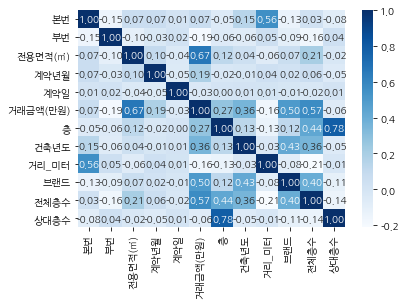

In [56]:
sns.heatmap(data=t.corr(),annot=True,cmap="Blues",fmt='.2f')

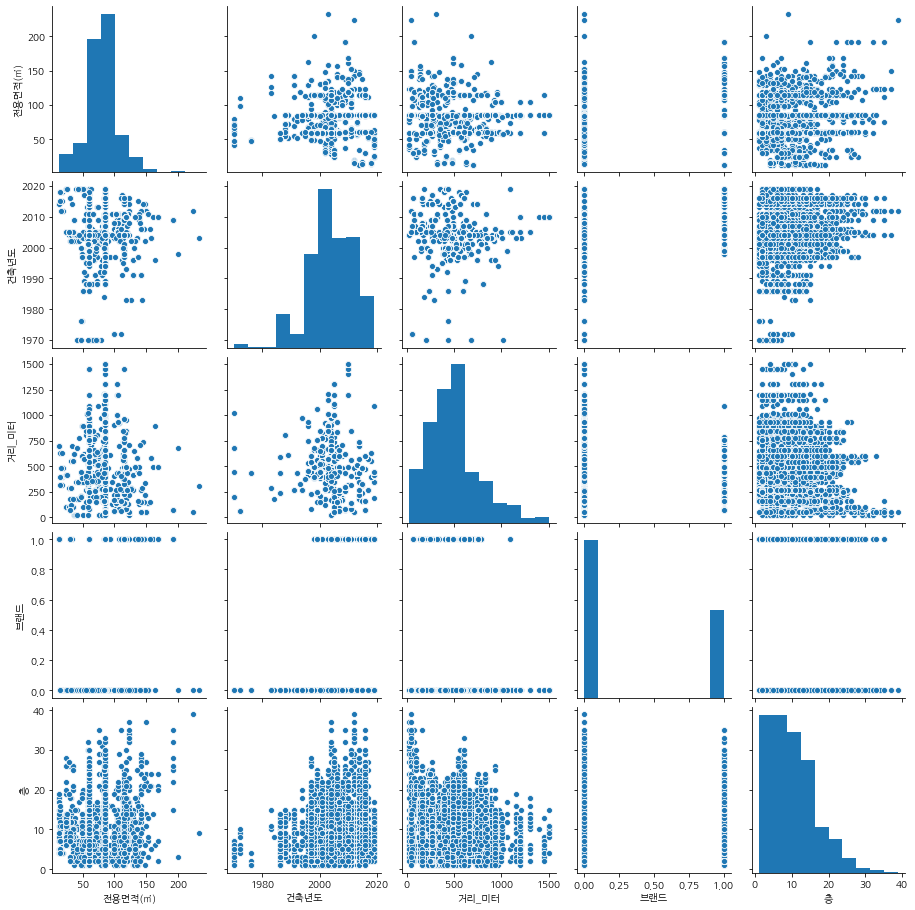

In [57]:
sns.pairplot(t[["전용면적(㎡)","건축년도","거리_미터","브랜드","층","시군구"]])

### VIF

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_set=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","층"]]

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_set.values, i) for i in range(x_set.shape[1])]
vif["features"]=x_set.columns
vif

VIF Factor features
0    9.969448  전용면적(㎡)
1   16.373298     건축년도
2    4.469697    거리_미터
3    1.588325      브랜드
4    3.546753        층

### 상대층수

In [61]:
t[t.상대층수>1]

시군구     번지   본번  부번    단지명  전용면적(㎡)    계약년월  계약일  거래금액(만원)  \
903   서울특별시 마포구 망원동    502  502   0  함성월드빌    76.14  201908   23     60000   
904   서울특별시 마포구 망원동    502  502   0  함성월드빌    84.70  201910   21     70000   
2537   서울특별시 마포구 중동  14946   40  12     현대    84.94  201910    1     60000   
2538   서울특별시 마포구 중동  14946   40  12     현대    59.54  201911   23     55000   

       층  건축년도        도로명  거리_미터  브랜드  전체층수      상대층수  
903   12  2003  망원로11길 73    298    0     9  1.333333  
904   12  2003  망원로11길 73    298    0     9  1.333333  
2537  19  2000    성암로7길 3    530    0    15  1.266667  
2538  17  2000    성암로7길 3    530    0    15  1.133333

### 지역변수

In [59]:
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(with_locals.values, i) for i in range(with_locals.shape[1])]
vif["features"]=with_locals.columns
vif

VIF Factor            features
0       1.902250             전용면적(㎡)
1       1.653541                건축년도
2       2.857086               거리_미터
3       2.079664                 브랜드
4       1.043383                상대층수
5   11363.933869   시군구_서울특별시 마포구 공덕동
6    1047.164905  시군구_서울특별시 마포구 노고산동
7    4365.425518   시군구_서울특별시 마포구 대흥동
8   10052.097261   시군구_서울특별시 마포구 도화동
9     100.341018   시군구_서울특별시 마포구 동교동
10   1748.017021   시군구_서울특별시 마포구 마포동
11   9308.667397   시군구_서울특별시 마포구 망원동
12    398.035985   시군구_서울특별시 마포구 상수동
13  14041.133643   시군구_서울특별시 마포구 상암동
14  14708.543080   시군구_서울특별시 마포구 서교동
15  14174.706423   시군구_서울특별시 마포구 성산동
16   9153.746605  시군구_서울특별시 마포구 신공덕동
17   4530.505358   시군구_서울특별시 마포구 신수동
18   1735.035869   시군구_서울특별시 마포구 신정동
19    940.533981   시군구_서울특별시 마포구 아현동
20   2425.341813   시군구_서울특별시 마포구 연남동
21   3517.473203   시군구_서울특별시 마포구 염리동
22   1589.003364   시군구_서울특별시 마포구 용강동
23   6167.956748    시군구_서울특별시 마포구 중동
24   8449.016944   시군구_서울특별시 마포구 창전동
25   1386.298650   시군구_서울특별시 마포구 토정동
26    649.370008   시군구_서울특별시 마포구 하중동
27   1249.779934   시군구_서울특별시 마포구 합정동
28   2179.296455   시군구_서울특별시 마포구 현석동

In [60]:
t[(t["전용면적(㎡)"]>100)&(t["거래금액(만원)"]<100000)].시군구.value_counts()

서울특별시 마포구 도화동     24
서울특별시 마포구 망원동     19
서울특별시 마포구 성산동     12
서울특별시 마포구 중동       7
서울특별시 마포구 아현동      6
서울특별시 마포구 상암동      6
서울특별시 마포구 창전동      5
서울특별시 마포구 신공덕동     3
서울특별시 마포구 마포동      3
서울특별시 마포구 신수동      3
서울특별시 마포구 연남동      2
서울특별시 마포구 신정동      2
서울특별시 마포구 공덕동      2
서울특별시 마포구 합정동      1
서울특별시 마포구 서교동      1
Name: 시군구, dtype: int64

In [62]:
t.groupby("시군구")["거래금액(만원)"].mean().to_frame() #지가

거래금액(만원)
시군구                          
서울특별시 마포구 공덕동   103536.070946
서울특별시 마포구 노고산동   29770.000000
서울특별시 마포구 대흥동    92451.865672
서울특별시 마포구 도화동    87265.267176
서울특별시 마포구 동교동    72700.000000
서울특별시 마포구 마포동    55924.137931
서울특별시 마포구 망원동    56481.843575
서울특별시 마포구 상수동   122290.000000
서울특별시 마포구 상암동    83764.147287
서울특별시 마포구 서교동   102727.325581
서울특별시 마포구 성산동    67903.146552
서울특별시 마포구 신공덕동   87834.325397
서울특별시 마포구 신수동    85498.734177
서울특별시 마포구 신정동    87781.818182
서울특별시 마포구 아현동   120002.871622
서울특별시 마포구 연남동    64731.666667
서울특별시 마포구 염리동    94258.771930
서울특별시 마포구 용강동   138751.219512
서울특별시 마포구 중동     67864.659091
서울특별시 마포구 창전동    89512.571429
서울특별시 마포구 토정동    88612.857143
서울특별시 마포구 하중동   161145.454545
서울특별시 마포구 합정동    95695.454545
서울특별시 마포구 현석동   106609.375000

In [63]:
with_locals=t[["전용면적(㎡)","건축년도","거리_미터","브랜드","상대층수","시군구"]]
with_locals=pd.get_dummies(with_locals)
with_locals

전용면적(㎡)  건축년도  거리_미터  브랜드  상대층수  시군구_서울특별시 마포구 공덕동  시군구_서울특별시 마포구 노고산동  \
0       84.94  1999    235    0  0.88                  1                   0   
1       59.74  1999    235    0  0.64                  1                   0   
2       59.74  1999    235    0  0.20                  1                   0   
3       59.74  1999    235    0  0.40                  1                   0   
4       84.94  1999    235    0  0.92                  1                   0   
...       ...   ...    ...  ...   ...                ...                 ...   
2908    59.40  1999    246    1  0.08                  0                   0   
2909    59.40  1999    754    1  0.08                  0                   0   
2910    59.40  1999    246    1  0.08                  0                   0   
2911    59.40  1999    754    1  0.08                  0                   0   
2912    59.40  1999    246    1  0.08                  0                   0   

      시군구_서울특별시 마포구 대흥동  시군구_서울특별시 마포구 도화동  시군구_서울특별시 마포구 동교동  ...  \
0                     0                  0                  0  ...   
1                     0                  0                  0  ...   
2                     0                  0                  0  ...   
3                     0                  0                  0  ...   
4                     0                  0                  0  ...   
...                 ...                ...                ...  ...   
2908                  0                  0                  0  ...   
2909                  0                  0                  0  ...   
2910                  0                  0                  0  ...   
2911                  0                  0                  0  ...   
2912                  0                  0                  0  ...   

      시군구_서울특별시 마포구 아현동  시군구_서울특별시 마포구 연남동  시군구_서울특별시 마포구 염리동  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
2908                  0                  0                  0   
2909                  0                  0                  0   
2910                  0                  0                  0   
2911                  0                  0                  0   
2912                  0                  0                  0   

      시군구_서울특별시 마포구 용강동  시군구_서울특별시 마포구 중동  시군구_서울특별시 마포구 창전동  \
0                     0                 0                  0   
1                     0                 0                  0   
2                     0                 0                  0   
3                     0                 0                  0   
4                     0                 0                  0   
...                 ...               ...                ...   
2908                  0                 0                  0   
2909                  0                 0                  0   
2910                  0                 0                  0   
2911                  0                 0                  0   
2912                  0                 0                  0   

      시군구_서울특별시 마포구 토정동  시군구_서울특별시 마포구 하중동  시군구_서울특별시 마포구 합정동  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
2908                  0                  0                  0   
2909                  0                  0                  0   
2910                  0                  0                  0   
2911

In [64]:
x=with_locals
y=t[["거래금액(만원)"]]
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     347.1
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:20:01   Log-Likelihood:                -32376.
No. Observations:                2913   AIC:                         6.481e+04
Df Residuals:                    2884   BIC:                         6.498e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.222e+06   9.18e+04    -13.304      0.000    -1.4e+06   -1.04e+06
전용면적(㎡)              804.7600     12.510     64.332      0.000     780.231     829.289
건축년도                 648.5743     47.707     13.595      0.000     555.031     742.118
거리_미터                -14.5445      1.617     -8.997      0.000     -17.714     -11.375
브랜드                 1.589e+04    973.621     16.318      0.000     1.4e+04    1.78e+04
상대층수                2849.8741   1137.552      2.505      0.012     619.376    5080.372
시군구_서울특별시 마포구 공덕동  -4.109e+04   3888.819    -10.566      0.000   -4.87e+04   -3.35e+04
시군구_서울특별시 마포구 노고산동  -7.36e+04   5274.177    -13.955      0.000   -8.39e+04   -6.33e+04
시군구_서울특별시 마포구 대흥동  -4.299e+04   4114.149    -10.448      0.000   -5.11e+04   -3.49e+04
시군구_서울특별시 마포구 도화동  -5.114e+04   3824.500    -13.372      0.000   -5.86e+04   -4.36e+04
시군구_서울특별시 마포구 동교동  -7.168e+04   1.62e+04     -4.438      0.000   -1.03e+05      -4e+04
시군구_서울특별시 마포구 마포동  -6.553e+04   4774.426    -13.725      0.000   -7.49e+04   -5.62e+04
시군구_서울특별시 마포구 망원동  -7.472e+04   4211.381    -17.743      0.000    -8.3e+04   -6.65e+04
시군구_서울특별시 마포구 상수동  -4.455e+04   4504.523     -9.890      0.000   -5.34e+04   -3.57e+04
시군구_서울특별시 마포구 상암동  -4.529e+04   4396.752    -10.301      0.000   -5.39e+04   -3.67e+04
시군구_서울특별시 마포구 서교동  -5.472e+04   4558.093    -12.006      0.000   -6.37e+04   -4.58e+04
시군구_서울특별시 마포구 성산동  -5.219e+04   3631.838    -14.369      0.000   -5.93e+04   -4.51e+04
시군구_서울특별시 마포구 신공덕동 -5.258e+04   4163.673    -12.628      0.000   -6.07e+04   -4.44e+04
시군구_서울특별시 마포구 신수동  -5.323e+04   4383.917    -12.141      0.000   -6.18e+04   -4.46e+04
시군구_서울특별시 마포구 신정동  -4.661e+04   4644.535    -10.035      0.000   -5.57e+04   -3.75e+04
시군구_서울특별시 마포구 아현동  -3.168e+04   4203.768     -7.536      0.000   -3.99e+04   -2.34e+04
시군구_서울특별시 마포구 연남동  -6.227e+04   4665.039    -13.347      0.000   -7.14e+04   -5.31e+04
시군구_서울특별시 마포구 염리동  -4.755e+04   3980.295    -11.946      0.000   -5.54e+04   -3.97e+04
시군구_서울특별시 마포구 용강동  -2.088e+04   4485.461     -4.654      0.000   -2.97e+04   -1.21e+04
시군구_서울특별시 마포구 중동   -6.234e+04   4271.190    -14.596      0.000   -7.07e+04    -5.4e+04
시군구_서울특별시 마포구 창전동  -5.394e+04   4067.613    -13.262      0.000   -6.19e+04    -4.6e+04
시군구_서울특별시 마포구 토정동  -3.227e+04   4532.490     -7.120      0.000   -4.12e+04   -2.34e+04
시군구_서울특별시 마포구 하중동   -3.51e+04   5299.119     -6.624      0.000   -4.55e+04   -2.47e+04
시군구_서울특별시 마포구 합정동  -6.492e+04   4742.529    -13.688      0.000   -7.42e+04   -5.56e+04
시군구_서울특별시 마포구 현석동  -4.072e+04   4263.157     -9.552      0.000   -4.91e+04   -3.24e+04
==============================================================================
Omnibus:                      235.683   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (J

### 월별_평당가격

In [65]:
date=[str(i)[:4]+"-"+str(i)[4:] for i in t.계약년월]
t["date"]=pd.to_datetime(date).to_period(freq='M')
t=t.sort_values(by="date")
t.head()

시군구     번지   본번  부번        단지명  전용면적(㎡)    계약년월  계약일  \
0     서울특별시 마포구 공덕동    371  371   0   공덕1삼성래미안    84.94  201901   12   
1275  서울특별시 마포구 서교동    490  490   0     메세나폴리스   223.31  201901   22   
1323  서울특별시 마포구 서교동  371-7  371   7  엠제이더퍼스트홍대    17.46  201901    2   
1324  서울특별시 마포구 서교동  371-7  371   7  엠제이더퍼스트홍대    14.89  201901   10   
1325  서울특별시 마포구 서교동  371-7  371   7  엠제이더퍼스트홍대    14.97  201901   23   

      거래금액(만원)   층  건축년도         도로명  거리_미터  브랜드  전체층수    상대층수     date  
0       120000  22  1999  마포대로 115-8    235    0    25  0.8800  2019-01  
1275    338000  39  2012      양화로 45     48    0    39  1.0000  2019-01  
1323     24900   4  2018     양화로 114    397    0    16  0.2500  2019-01  
1324     25800   5  2018     양화로 114    397    0    16  0.3125  2019-01  
1325     24400   4  2018     양화로 114    397    0    16  0.2500  2019-01

In [66]:
t["평"]=(t["전용면적(㎡)"]/3.3).round(2)
t["평당가격"]=t["거래금액(만원)"]/t["평"].round(2)
a=pd.DataFrame(t["평당가격"].groupby(t['date']).mean())
a.columns=["월별_평당가격"]
a

월별_평당가격
date                
2019-01  3659.169719
2019-02  3792.361773
2019-03  3757.058477
2019-04  3651.792803
2019-05  3825.357636
2019-06  3986.900994
2019-07  4055.325327
2019-08  4029.239943
2019-09  3943.308977
2019-10  4108.786387
2019-11  4237.956179
2019-12  4071.707838

In [67]:
a.pct_change()

월별_평당가격
date             
2019-01       NaN
2019-02  0.036400
2019-03 -0.009309
2019-04 -0.028018
2019-05  0.047529
2019-06  0.042230
2019-07  0.017162
2019-08 -0.006432
2019-09 -0.021327
2019-10  0.041964
2019-11  0.031437
2019-12 -0.039228

In [68]:
f=pd.merge(t,a.shift(),on="date",how='left')

x=f[["전용면적(㎡)","건축년도","거리_미터","브랜드","층","월별_평당가격","시군구"]]
x=sm.add_constant(x)
x=pd.get_dummies(x)
y=f[["거래금액(만원)"]]

model=sm.OLS(y,x,missing="drop")
results=model.fit()
results.summary()

C:\Users\yuna9\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               거래금액(만원)   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     368.8
Date:                Sat, 19 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:20:54   Log-Likelihood:                -31702.
No. Observations:                2868   AIC:                         6.346e+04
Df Residuals:                    2838   BIC:                         6.364e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.271e+06    8.8e+04    -14.444      0.000   -1.44e+06    -1.1e+06
전용면적(㎡)              768.8165     12.202     63.009      0.000     744.891     792.742
건축년도                 628.2677     45.557     13.791      0.000     538.940     717.596
거리_미터                -12.0610      1.543     -7.819      0.000     -15.086      -9.036
브랜드                 1.484e+04    924.002     16.063      0.000     1.3e+04    1.67e+04
층                    581.6608     47.712     12.191      0.000     488.108     675.214
월별_평당가격               22.3438      1.887     11.838      0.000      18.643      26.045
시군구_서울특별시 마포구 공덕동  -4.232e+04   3721.567    -11.371      0.000   -4.96e+04    -3.5e+04
시군구_서울특별시 마포구 노고산동 -7.762e+04   5084.427    -15.266      0.000   -8.76e+04   -6.76e+04
시군구_서울특별시 마포구 대흥동   -4.61e+04   3934.406    -11.716      0.000   -5.38e+04   -3.84e+04
시군구_서울특별시 마포구 도화동  -5.283e+04   3661.708    -14.427      0.000      -6e+04   -4.56e+04
시군구_서울특별시 마포구 동교동  -7.236e+04   1.52e+04     -4.752      0.000   -1.02e+05   -4.25e+04
시군구_서울특별시 마포구 마포동  -6.646e+04   4577.200    -14.519      0.000   -7.54e+04   -5.75e+04
시군구_서울특별시 마포구 망원동  -7.412e+04   4052.391    -18.291      0.000   -8.21e+04   -6.62e+04
시군구_서울특별시 마포구 상수동  -4.579e+04   4297.303    -10.656      0.000   -5.42e+04   -3.74e+04
시군구_서울특별시 마포구 상암동  -4.863e+04   4212.224    -11.544      0.000   -5.69e+04   -4.04e+04
시군구_서울특별시 마포구 서교동  -5.699e+04   4364.540    -13.057      0.000   -6.55e+04   -4.84e+04
시군구_서울특별시 마포구 성산동  -5.335e+04   3483.259    -15.316      0.000   -6.02e+04   -4.65e+04
시군구_서울특별시 마포구 신공덕동 -5.399e+04   3963.833    -13.621      0.000   -6.18e+04   -4.62e+04
시군구_서울특별시 마포구 신수동  -5.592e+04   4198.831    -13.319      0.000   -6.42e+04   -4.77e+04
시군구_서울특별시 마포구 신정동  -5.019e+04   4452.715    -11.271      0.000   -5.89e+04   -4.15e+04
시군구_서울특별시 마포구 아현동   -3.33e+04   4018.824     -8.286      0.000   -4.12e+04   -2.54e+04
시군구_서울특별시 마포구 연남동  -6.246e+04   4489.989    -13.910      0.000   -7.13e+04   -5.37e+04
시군구_서울특별시 마포구 염리동  -4.876e+04   3803.456    -12.820      0.000   -5.62e+04   -4.13e+04
시군구_서울특별시 마포구 용강동   -2.25e+04   4279.929     -5.256      0.000   -3.09e+04   -1.41e+04
시군구_서울특별시 마포구 중동   -6.748e+04   4089.076    -16.502      0.000   -7.55e+04   -5.95e+04
시군구_서울특별시 마포구 창전동  -5.564e+04   3905.091    -14.248      0.000   -6.33e+04    -4.8e+04
시군구_서울특별시 마포구 토정동  -3.722e+04   4321.802     -8.613      0.000   -4.57e+04   -2.87e+04
시군구_서울특별시 마포구 하중동  -3.536e+04   5027.850     -7.033      0.000   -4.52e+04   -2.55e+04
시군구_서울특별시 마포구 합정동  -6.652e+04   4515.216    -14.732      0.000   -7.54e+04   -5.77e+04
시군구_서울특별시 마포구 현석동  -4.479e+04   4068.883    -11.009      0.000   -5.28e+04   -3.68e+04
==============================================================================
Omnibus:                      241.120   Durbin

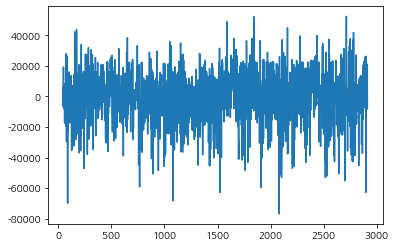

In [69]:
results.resid.plot()

## OLS 예측

In [74]:
from sklearn.utils import shuffle
f=shuffle(f)
f.head()

시군구    번지    본번  부번          단지명  전용면적(㎡)    계약년월  계약일  \
2669  서울특별시 마포구 대흥동   660   660   0         마포태영    59.40  201912   23   
419   서울특별시 마포구 망원동   507   507   0      신부파스카4차    77.51  201906    8   
1373  서울특별시 마포구 성산동   446   446   0     성산시영(유원)    59.43  201909   26   
2662  서울특별시 마포구 대흥동   660   660   0         마포태영    59.40  201912   15   
2681  서울특별시 마포구 상암동  1743  1743   0  상암월드컵파크12단지    84.66  201912   15   

      거래금액(만원)   층  건축년도          도로명  거리_미터  브랜드  전체층수      상대층수     date  \
2669     90000  23  1999      독막로 266    482    0    25  0.920000  2019-12   
419      56500   4  2004      방울내로 43    637    0    13  0.307692  2019-06   
1373     80000  13  1986    월드컵북로 235    240    0    14  0.928571  2019-09   
2662     89700   9  1999      독막로 266    482    0    25  0.360000  2019-12   
2681     84500   7  2010  월드컵북로 502-7   1450    0    15  0.466667  2019-12   

          평         평당가격      월별_평당가격  
2669  18.00  5000.000000  4237.956179  
419   23.49  2405.278842  3825.357636  
1373  18.01  4441.976680  4029.239943  
2662  18.00  4983.333333  4237.956179  
2681  25.65  3294.346979  4237.956179

In [75]:
 f["역세권"]= (f["거리_미터"] <= 500).astype(int)

In [77]:
from sklearn.linear_model import LinearRegression

In [81]:
from sklearn.model_selection import train_test_split

k=f.dropna()
x=k[["전용면적(㎡)","건축년도","시군구","브랜드","층","역세권","월별_평당가격"]]
x=sm.add_constant(x)
x=pd.get_dummies(x)
y=k[["거래금액(만원)"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

y_predict=mlr.predict(x_test)

In [82]:
print(mlr.score(x_train,y_train))

0.7890009058773428


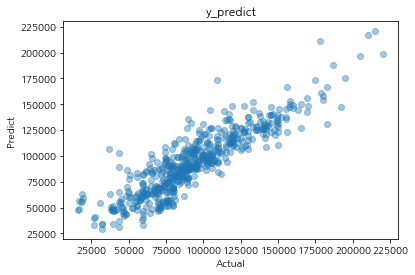

In [83]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Actual')
plt.ylabel("Predict")
plt.title("y_predict")
plt.show()

## 추가